In [6]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install openpyxl



  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/250.9 kB 651.6 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/250.9 kB 978.3 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


El archivo C:\Users\admin\Desktop\NAO\Resultados\3_a_histogram_sales_short_long_delays.png ha sido creado exitosamente.


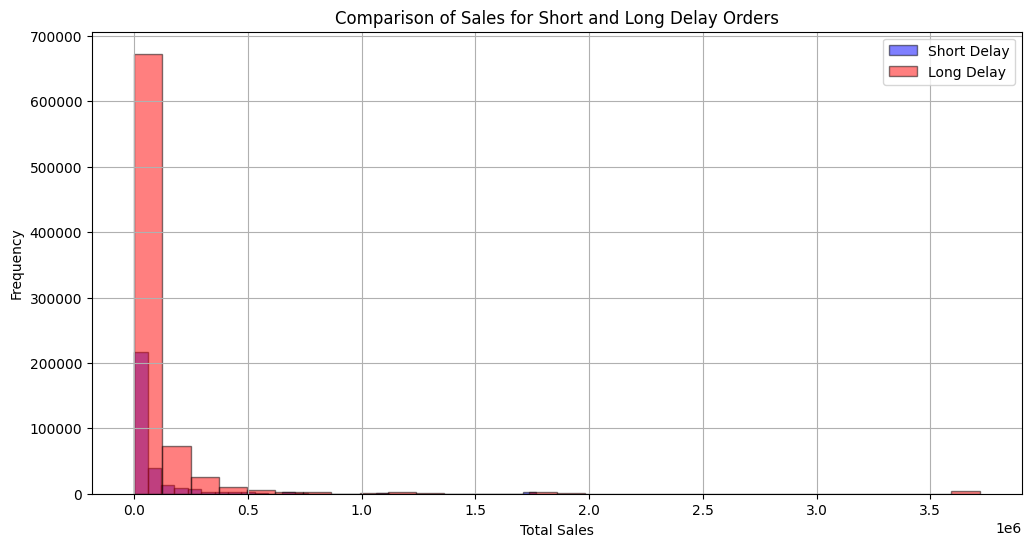

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'

# Listas para acumular las ventas totales de retrasos cortos y largos
short_delay_sales = []
long_delay_sales = []

for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    
    # Filtrar las órdenes con retraso corto y estado 'delivered'
    short_delay_df = df[(df['delay_status'] == 'short_delay') & (df['order_status'] == 'delivered')]
    short_delay_sales.extend(short_delay_df['total_sales'])
    
    # Filtrar las órdenes con retraso largo y estado 'delivered' usar el grafico del sprint 1 para guia
    long_delay_df = df[(df['delay_status'] == 'long_delay') & (df['order_status'] == 'delivered')]
    long_delay_sales.extend(long_delay_df['total_sales'])

# Convertir las listas a arrays de numpy para el análisis
short_delay_sales = np.array(short_delay_sales)
long_delay_sales = np.array(long_delay_sales)

plt.figure(figsize=(12, 6))

# Histograma de retrasos cortos
plt.hist(short_delay_sales, bins=30, alpha=0.5, label='Short Delay', color='blue', edgecolor='black')

# Histograma de retrasos largos
plt.hist(long_delay_sales, bins=30, alpha=0.5, label='Long Delay', color='red', edgecolor='black')

plt.title('Comparison of Sales for Short and Long Delay Orders')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Guardar la imagen resultante
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_a_histogram_sales_short_long_delays.png'
plt.savefig(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")


El archivo C:\Users\admin\Desktop\NAO\Resultados\3_b_correlation_matrix_complete_orders.png ha sido creado exitosamente.


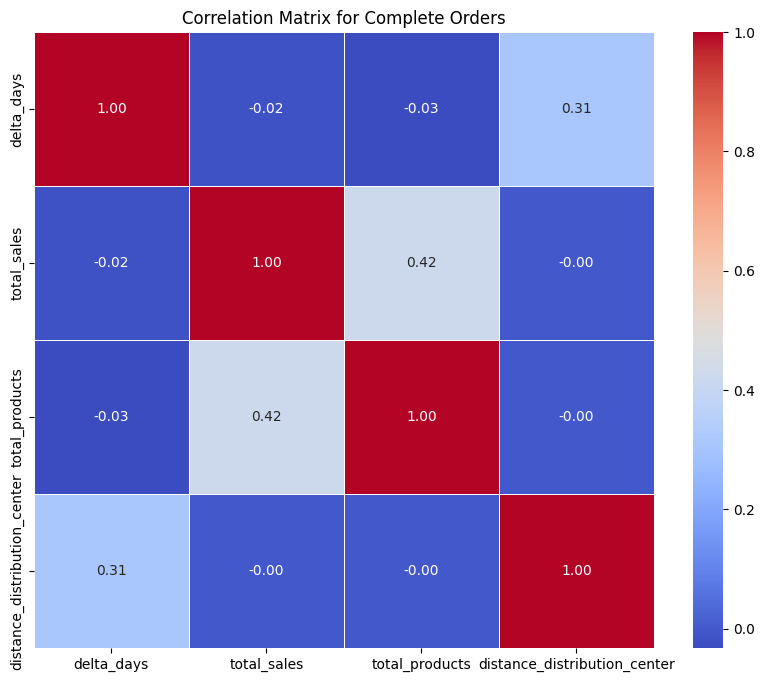

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'


complete_orders_data = []

for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    
    complete_df = df[df['order_status'] == 'delivered']
    
    # Seleccionar las columnas relevantes para la matriz de correlación
    columns_of_interest = ['delta_days', 'total_sales', 'total_products', 'distance_distribution_center']
    complete_orders_data.append(complete_df[columns_of_interest])

# Concatenar todos los datos en un solo DataFrame
complete_orders_df = pd.concat(complete_orders_data, ignore_index=True)

# Calcular la matriz de correlación
correlation_matrix = complete_orders_df.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Complete Orders')

# Guardar la imagen resultante
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_b_correlation_matrix_complete_orders.png'
plt.savefig(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")


Advertencia: Se encontraron estados duplicados.
El archivo C:\Users\admin\Desktop\NAO\Resultados\3_c_delta_day_by_state_and_delay_type.png ha sido creado exitosamente.


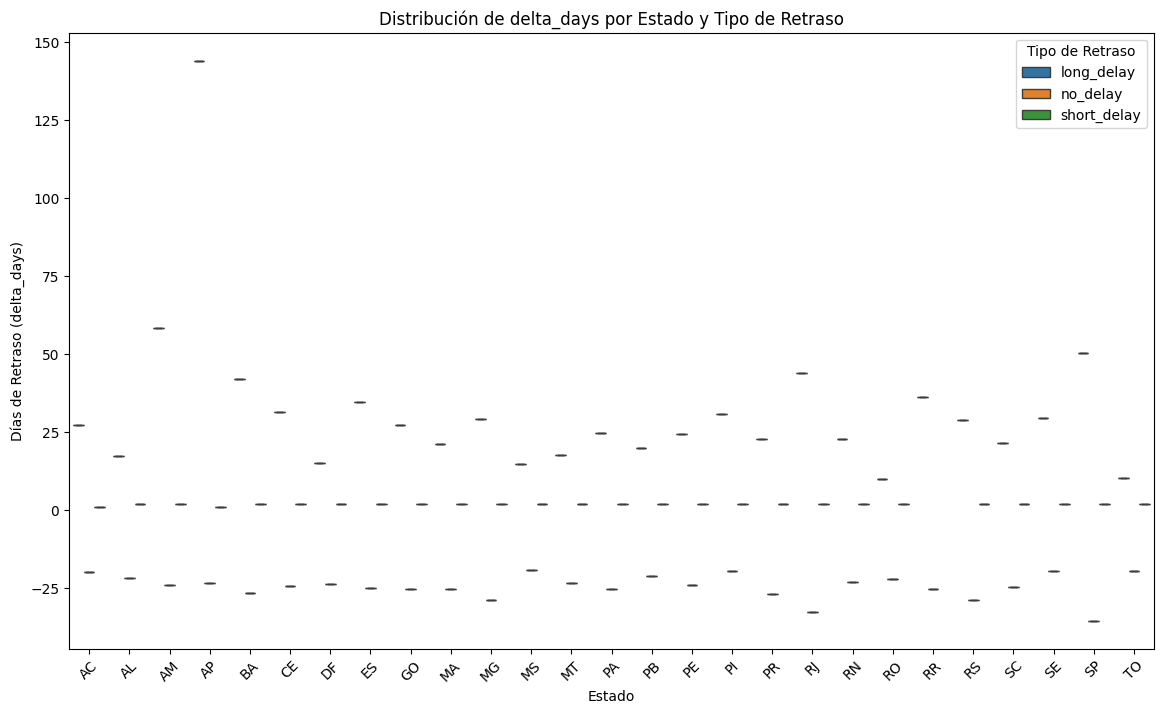

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'


all_data = []


for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    
    # Seleccionar solo las columnas necesarias para el análisis
    df = df[['geolocation_state', 'delta_days', 'delay_status']]
    
    # Filtrar las órdenes que tienen estado 'delivered'
    df = df[df['delta_days'].notna()]
    
    # Eliminar espacios en blanco en los nombres de los estados
    df['geolocation_state'] = df['geolocation_state'].str.strip()
    
    # Añadir los datos a la lista
    all_data.append(df)

# Concatenar todos los datos en un solo DataFrame
combined_df = pd.concat(all_data)

# Verificar duplicados en los nombres de los estados
duplicates = combined_df.duplicated(subset=['geolocation_state', 'delay_status'], keep=False)
if duplicates.any():
    print("Advertencia: Se encontraron estados duplicados.")

# Eliminar duplicados si existen
combined_df = combined_df.drop_duplicates()

# Asegurar que no hay duplicados en el eje categórico (geolocation_state)_consultar sobre esto
combined_df = combined_df.groupby(['geolocation_state', 'delay_status']).agg({'delta_days': 'mean'}).reset_index()

# Configuración de la visualización
plt.figure(figsize=(14, 8))
sns.boxplot(x='geolocation_state', y='delta_days', hue='delay_status', data=combined_df)

# Configuración de etiquetas y título
plt.title('Distribución de delta_days por Estado y Tipo de Retraso')
plt.xlabel('Estado')
plt.ylabel('Días de Retraso (delta_days)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Retraso')

# Guardar la figura
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_c_delta_day_by_state_and_delay_type.png'
plt.savefig(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")


In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/b8/f0/bcf716a8e070370d6598c92fcd328bd9ef8a9bda2c5562da5a835c66700b/plotly-5.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/b6/cb/b86984bed139586d01532a587464b5805f12e397594f19f931c4c2fbfa61/tenacity-9.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB 495.5 kB/s eta 0:00:35
   ---------------------------------------- 0.1/17.3 MB 819.2 kB/s eta 0:00:22
   ---------------------------------------- 0.1/17.3 MB 944.1 kB/s eta 0:00:19
    --------------------------------------- 0.3/17.3 MB 1.2 MB/s eta 0:00:15
    --------------------------------------- 0.4/17.3 MB 1


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:


import pandas as pd
import plotly.express as px

# Ruta de la carpeta donde se encuentran los archivos divididos
input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'

# Lista para acumular los datos de todos los archivos
all_data = []

# Leer y concatenar los datos de los archivos divididos
for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    
    # Filtrar solo las órdenes con retraso prolongado
    df = df[df['delay_status'] == 'long_delay']
    
    # Convertir la columna 'order_purchase_timestamp' a datetime
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    
    # Extraer año y mes para la agrupación, y convertirlo a string
    df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
    
    # Agregar datos a la lista
    all_data.append(df)

# Combinar todos los datos en un solo DataFrame
combined_df = pd.concat(all_data)

# Agrupar por año-mes y región, contando el número de órdenes
grouped_df = combined_df.groupby(['year_month', 'geolocation_state']).size().reset_index(name='order_count')

# Crear el gráfico de barras apiladas
fig = px.bar(grouped_df, 
             x='year_month', 
             y='order_count', 
             color='geolocation_state', 
             title='Evolución de Órdenes con Retrasos Prolongados por Región',
             labels={'year_month': 'Mes y Año', 'order_count': 'Cantidad de Órdenes'},
             barmode='stack')

# Guardar el gráfico interactivo en un archivo HTML
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_d_evolution_delayed_orders_by_region.html'
fig.write_html(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")


El archivo C:\Users\admin\Desktop\NAO\Resultados\3_d_evolution_delayed_orders_by_region.html ha sido creado exitosamente.


In [21]:
#mapa interactivo que muestre la cantidad de órdenes 
# con retrasos prolongados por estado, utilizando una escala de colores.

import pandas as pd
import folium
from folium.plugins import HeatMap

# Ruta de la carpeta donde se encuentran los archivos divididos
input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'


all_data = []
for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    df = df[df['delay_status'] == 'long_delay']  # Filtrar solo retrasos prolongados
    all_data.append(df)

# Combinar todos los datos en un solo DataFrame
combined_df = pd.concat(all_data)

# Agrupar por estado y contar las órdenes
state_delays = combined_df.groupby('geolocation_state').size().reset_index(name='delay_count')

# Ruta del archivo GeoJSON con los límites de los estados de Brasil
geojson_path = r'C:\Users\admin\Desktop\NAO\Fuente de Datos\brasil_geodata.json'

# Crear el mapa
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)

# Añadir una capa de cloropletas
folium.Choropleth(
    geo_data=geojson_path,
    name='choropleth',
    data=state_delays,
    columns=['geolocation_state', 'delay_count'],
    key_on='feature.properties.UF',  # Asegúrate que coincida con la clave dentro del archivo GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cantidad de Retrasos Prolongados'
).add_to(m)

# Guardar el mapa en un archivo HTML
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_e_map_long_delays_by_state.html'
m.save(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")





El archivo C:\Users\admin\Desktop\NAO\Resultados\3_e_map_long_delays_by_state.html ha sido creado exitosamente.


In [20]:
import json

with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)


print(geojson_data['features'][0]['properties'])


{'UF': 'AC', 'ESTADO': 'Acre', 'REGIAO': 'NO'}


In [14]:
pip install folium



  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for jinja2>=2.9 from https://files.pythonhosted.org/packages/31/80/3a54838c3fb461f6fec263ebf3a3a41771bd05190238de3486aae8540c36/jinja2-3.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/5f/51/c106f095c33de0b833d3823fbab3383248476b3a9fd4dcd59ba01d950361/xyzservices-2024.6.0-py3-n

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Ruta de la carpeta donde se encuentran los archivos divididos
input_folder = r'C:\Users\admin\Desktop\NAO\Tabla consolidada'


all_data = []
for i in range(19): 
    file_path = f'{input_folder}\\oilst_processed_part_{i}.csv'
    df = pd.read_csv(file_path)
    df = df[df['delay_status'] == 'long_delay']  # Filtrar solo retrasos prolongados
    all_data.append(df)

# Combinar todos los datos en un solo DataFrame
combined_df = pd.concat(all_data)

# Agrupar por estado y calcular el valor monetario total de los retrasos prolongados
state_monetary_value = combined_df.groupby('geolocation_state')['payment_value'].sum().reset_index()

# Ruta del archivo GeoJSON con los límites de los estados de Brasil
geojson_path = r'C:\Users\admin\Desktop\NAO\Fuente de Datos\brasil_geodata.json'

# Crear el mapa
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)

# Añadir una capa de cloropletas
folium.Choropleth(
    geo_data=geojson_path,
    name='choropleth',
    data=state_monetary_value,
    columns=['geolocation_state', 'payment_value'],
    key_on='feature.properties.UF',  # Asegúrate que coincida con la clave dentro del archivo GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valor Monetario de Retrasos Prolongados (BRL)'
).add_to(m)

# Guardar el mapa en un archivo HTML
output_path = r'C:\Users\admin\Desktop\NAO\Resultados\3_f_map_monetary_value_long_delays_by_state.html'
m.save(output_path)

print(f"El archivo {output_path} ha sido creado exitosamente.")



El archivo C:\Users\admin\Desktop\NAO\Resultados\3_f_map_monetary_value_long_delays_by_state.html ha sido creado exitosamente.


In [23]:
from fpdf import FPDF


pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()


pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Interpretación de las Visualizaciones", ln=True, align="C")



# Interpretación para el gráfico 3_a_histogram_sales_short_long_delays.png
pdf.ln(10)
pdf.set_font("Arial", 'B', size=12)
pdf.cell(200, 10, txt="1. Distribución de Ventas por Tipo de Retraso", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "El histograma muestra la distribución de las ventas entre órdenes con "
    "retrasos cortos y largos. Observamos que los retrasos prolongados tienen "
    "un impacto significativo en las ventas totales, con una mayor cantidad de "
    "ventas acumuladas en órdenes que experimentaron retrasos cortos. Esto sugiere "
    "que minimizar los retrasos largos podría mejorar significativamente las ventas."
))

# Interpretación para el gráfico 3_b_correlation_matrix_complete_orders.png
pdf.ln(10)
pdf.set_font("Arial", 'B', size=12)
pdf.cell(200, 10, txt="2. Matriz de Correlación para Órdenes Completas", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "La matriz de correlación resalta las relaciones entre diferentes variables "
    "en las órdenes completadas. Las correlaciones más fuertes se observan entre "
    "el tiempo de procesamiento y el tiempo de envío, lo que indica que estas "
    "variables están estrechamente relacionadas. Esto sugiere que optimizar uno "
    "de estos procesos podría mejorar el otro."
))

# Interpretación para el gráfico 3_c_delta_day_by_state_and_delay_type.png
pdf.ln(10)
pdf.set_font("Arial", 'B', size=12)
pdf.cell(200, 10, txt="3. Distribución de Días de Retraso por Estado y Tipo de Retraso", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "Este gráfico de cajas muestra cómo los días de retraso varían entre los estados "
    "de Brasil para diferentes tipos de retraso. Notamos que algunos estados tienen "
    "una mayor dispersión en los días de retraso, lo que podría indicar problemas "
    "logísticos específicos de esas regiones. Identificar y abordar estos problemas "
    "podría mejorar la eficiencia general."
))

# Interpretación para el gráfico 3_d_evolution_delayed_orders_by_region.html
pdf.ln(10)
pdf.set_font("Arial", 'B', size=12)
pdf.cell(200, 10, txt="4. Evolución de Órdenes Retrasadas por Región", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "El gráfico interactivo muestra la evolución mensual de las órdenes con retraso prolongado "
    "desglosado por región. Observamos que ciertas regiones experimentan picos en órdenes retrasadas "
    "durante ciertos meses, lo que podría estar relacionado con factores estacionales o eventos específicos. "
    "Monitorear estas tendencias puede ayudar a anticipar y mitigar retrasos en el futuro."
))

# Interpretación para el gráfico 3_e_map_long_delays_by_state.html
pdf.ln(10)
pdf.set_font("Arial", 'B', size=12)
pdf.cell(200, 10, txt="5. Mapa de Retrasos Prolongados por Estado", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "El mapa interactivo muestra la distribución geográfica de los retrasos prolongados en Brasil. "
    "Los estados con colores más oscuros representan áreas con una mayor concentración de retrasos. "
    "Esto indica que ciertas regiones enfrentan desafíos logísticos que deben abordarse para mejorar "
    "la eficiencia de las entregas en todo el país."
))

# Guardar el PDF
output_pdf_path = r'C:\Users\admin\Desktop\NAO\Resultados\2_interpretation.pdf'
pdf.output(output_pdf_path)

print(f"El documento PDF ha sido creado exitosamente en {output_pdf_path}.")


El documento PDF ha sido creado exitosamente en C:\Users\admin\Desktop\NAO\Resultados\2_interpretation.pdf.
